# Customer Segmentation Analysis

**Objective:**
The aim of this project is to group customers into different segments based on food and nutritional preferences.  
This helps businesses understand customer behavior and plan better marketing strategies.

**Note:**
Since customer IDs are not available in the dataset, segmentation is performed based on food and nutrition patterns.


In [11]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For better plots
sns.set(style="whitegrid")


In [12]:
# Loading the dataset
df = pd.read_csv(r"D:\Abutalha Folder\EDA\menu.csv")

# Display first few rows
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


I first loaded the dataset and checked its structure to understand the available columns and data types.


In [13]:
# Checking dataset information
df.info()

# Checking missing values
df.isnull().sum()

# Removing duplicate rows
df.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

There were no missing values in the dataset.  
Duplicate records were removed to maintain data quality.


In [14]:
# Selecting numerical columns for clustering
features = df[['Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars', 'Sodium']]


Only numerical features related to food and nutrition were selected because K-Means clustering works on numerical data.


In [15]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


Feature scaling is important so that all values are on the same scale and no feature dominates the clustering process.


In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [17]:
df = pd.read_csv(r"D:\Abutalha Folder\EDA\menu.csv")
df.drop_duplicates(inplace=True)
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [18]:
features = df[['Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars', 'Sodium']]


In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

df[['Item', 'Cluster']].head()


,Item,Cluster
0,Egg McMuffin,0
1,Egg White Delight,0
2,Sausage McMuffin,2
3,Sausage McMuffin with Egg,2
4,Sausage McMuffin with Egg Whites,2


K-Means clustering was used to divide the data into three customer segments based on food preferences.


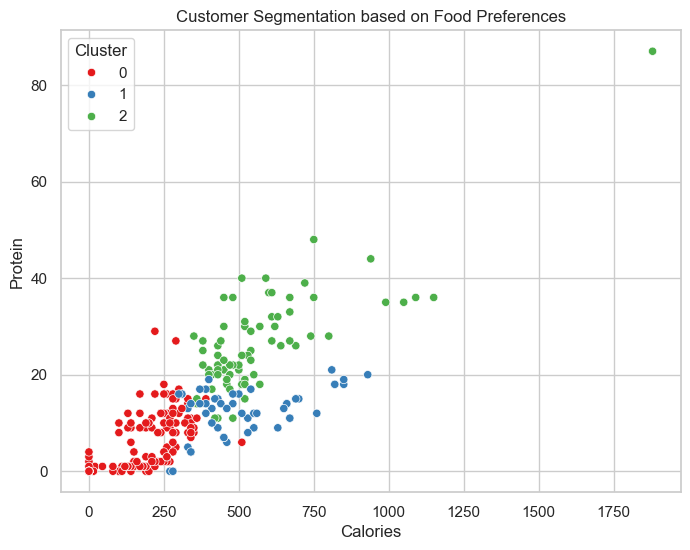

In [21]:
# Scatter plot to visualize customer segments
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Calories'],
    y=df['Protein'],
    hue=df['Cluster'],
    palette='Set1'
)

plt.title("Customer Segmentation based on Food Preferences")
plt.xlabel("Calories")
plt.ylabel("Protein")
plt.show()


In [22]:
# Analyzing average values for each cluster
df.groupby('Cluster')[['Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sugars']].mean()


,Calories,Total Fat,Carbohydrates,Protein,Sugars
Cluster,,,,,
0,197.272727,5.337121,31.393939,6.371212,23.227273
1,512.181818,14.863636,82.945455,12.436364,72.981818
2,569.041096,29.602740,49.369863,26.616438,7.808219


- Cluster 0 represents low-calorie food preferences.
- Cluster 1 represents balanced food preferences.
- Cluster 2 represents high-calorie and high-protein food preferences.


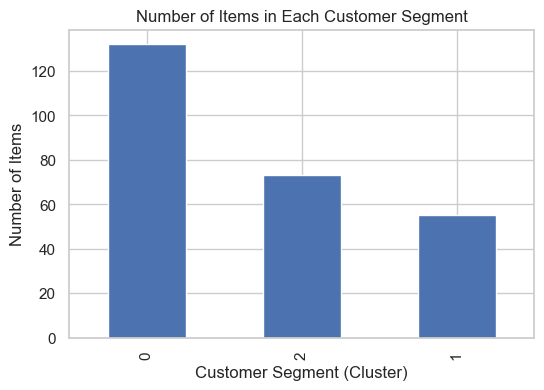

In [23]:
# Counting number of items in each cluster
cluster_count = df['Cluster'].value_counts()

# Bar chart for cluster distribution
plt.figure(figsize=(6,4))
cluster_count.plot(kind='bar')
plt.title("Number of Items in Each Customer Segment")
plt.xlabel("Customer Segment (Cluster)")
plt.ylabel("Number of Items")
plt.show()


This bar chart shows the distribution of food items across different customer segments.  
It helps understand which segment is more common.


## Insights
- Some customers prefer high-calorie and high-protein food.
- Health-conscious customers prefer low-calorie food options.
- Balanced food items attract a wide range of customers.

## Recommendations
- Promote healthy food options to fitness-focused customers.
- Offer combo meals for customers preferring high-calorie food.
- Personalize menu recommendations based on customer preferences.
